In [1]:
import pandas as pd
import numpy as np

In [104]:
example_task_scores = [0.8, 0.9, 0.7, 0.7, 0.8, 0.85, 0.85, 0.9, 0.1, 0.99, 0.2, 0.87, 0.14, 0.9, 0.1, 0.1, 0.1] # newest task score = 0.9 

# 5 types of people that we are considering so far 
# Type 1: increasing
# Type 2: decreasing
# Type 3: consistently good
# Type 4: consistently bad
# Type 5: troll
0.6, 0.7, 0.68, 0.71, 0.8, 0.6, 0.1, 0.9, 0.5, 0.3, 0.7, 0.3, 0.1, 

example_task_scores[5 - 3 + 1:5 + 1]

n = 200
random_task_scores = [np.random.random() for i in range(n)]
bad_task_scores = [np.random.random() * 0.5 for i in range(n)]
good_task_scores = [np.random.random() * 0.5 + 0.5 for i in range(n)]


In [105]:
def ucs(task_scores, n_func, a):
    score = 0.5
    example_ucs_scores = [0.5]
    c_values = [0.5]
    for i in range(len(task_scores)):
        n = n_func(i)
        scores = task_scores[max(0, i-n+1):i+1]
        var_scores = np.var(scores)
        c = var_scores / (np.log(i + 2) / np.log(a)) #have completed i + 1 tasks at this point
        c = 1 / (1 + np.exp(-2 * (c - 0.5)))
        c_values.append(c)
        score = score * (1 - c) + (c) * task_scores[i] #task_scores[i] = latest task score
        example_ucs_scores.append(score)

    return example_ucs_scores, c_values

def run_ucs(task_scores):
    a = 1000
    ucs_n, c_values_n = ucs(task_scores, lambda x: 20, a)
    ucs_proportional, c_values_proportional = ucs(task_scores, lambda n: int(.25 * n) + 1, a)
    ucs_scores_sqrt, c_values_sqrt = ucs(task_scores, lambda n: int(np.sqrt(n)) + 1, a)
    task_scores = [0] + task_scores

#     last sqrt(n)
    df = pd.DataFrame({'task scores': task_scores, 'ucs': ucs_scores_sqrt, 'c': c_values_sqrt}, index=range(len(c_values_n)))
    df.plot.line()
#     last n
    df = pd.DataFrame({'task scores': task_scores, 'ucs': ucs_n, 'c': c_values_n}, index=range(len(c_values_n)))
    df.plot.line()
#     last 25%
    df = pd.DataFrame({'task scores': task_scores, 'ucs': ucs_proportional, 'c': c_values_proportional}, index=range(len(c_values_n)))
    df.plot.line()


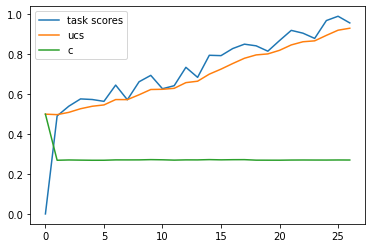

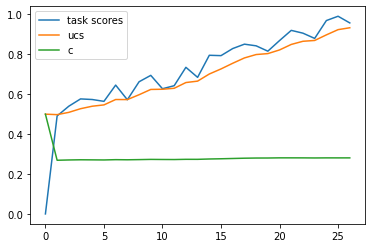

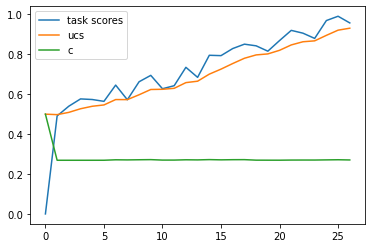

In [114]:
n = 26
random_task_scores = [np.random.random() for i in range(n)]
bad_task_scores = [np.random.random() * 0.5 for i in range(n)]
good_task_scores = [np.random.random() * 0.5 + 0.5 for i in range(n)]
improving_good_task_scores = [0.5 + i / (2*n) + np.random.random()*0.1-0.05 for i in range(n)]

run_ucs(improving_good_task_scores)